In [1]:
import numpy as np   
import pandas as pd  
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gren = Style.BRIGHT + Fore.GREEN
blk = Style.BRIGHT + Fore.BLACK
res = Style.RESET_ALL


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [8]:
df = pd.read_csv("Passanger_booking_data.csv")

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [11]:
print(f'{blk} Total number of null values in data {df.isna().sum().sum()}')
print(f' Total number of duplicate rows in data {df.duplicated().sum()}')
print(f'The shape of the original data {df.shape}')

 Total number of null values in data 0
 Total number of duplicate rows in data 719
The shape of the original data (50002, 14)


#  1.	Find any duplicate rows in dataset and remove all the duplicated if found?

In [12]:
print("Total number of duplicate rows in data") 
print(df.duplicated().sum())

#removing the duplicates
df=df.drop_duplicates()

print("The shape of the data after removing the duplicate rows") 
print(df.shape)

Total number of duplicate rows in data
719
The shape of the data after removing the duplicate rows
(49283, 14)


# 2. Create a pie chart showing count of completed booking and incomplete booking. Is the dataset balanced or imbalanced

Total bookings count:  49283


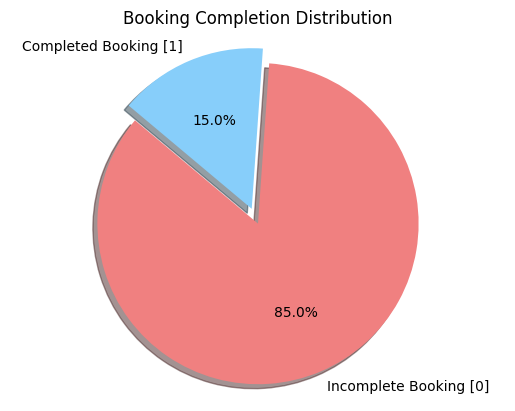

The dataset is imbalanced.


In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of booking_complete values
booking_counts = df['booking_complete'].value_counts()
print("Total bookings count: ",booking_counts.sum())

# Create a pie chart
labels = ['Incomplete Booking [0]', 'Completed Booking [1]']
sizes = [booking_counts[0], booking_counts[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Booking Completion Distribution')
plt.show()

# Determine if the dataset is balanced or imbalanced
if booking_counts[0] == booking_counts[1]:
    print("{blk}The dataset is balanced.")
else:
    print("The dataset is imbalanced.")


# 3. Create a bar graph showing booking completed through various sales channel?

<Figure size 1000x600 with 0 Axes>

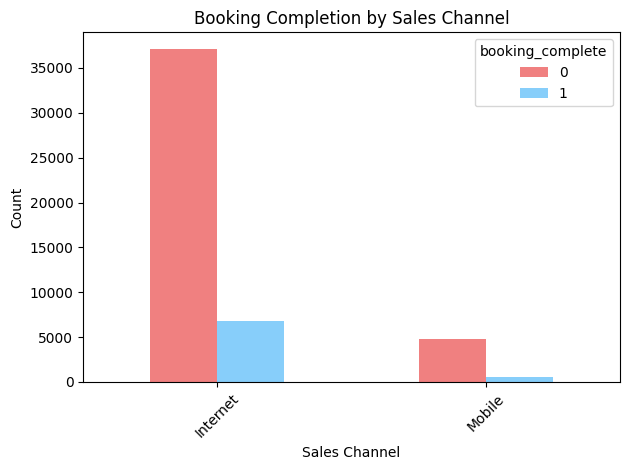

In [14]:
# Group data by sales channel and calculate the count of completed and incomplete bookings
sales_channel_data = df.groupby('sales_channel')['booking_complete'].value_counts().unstack().fillna(0)

# Create a bar graph
plt.figure(figsize=(10, 6))
sales_channel_data.plot(kind='bar', stacked=False, color=['lightcoral', 'lightskyblue'])
plt.title('Booking Completion by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(range(0, 35001, 5000))  # Set y-axis ticks from 0 to 35000 with an interval of 5000
plt.tight_layout()

plt.show()


# 4.	Create a bar graph showing booking completed on all flight_days?

<Figure size 1000x600 with 0 Axes>

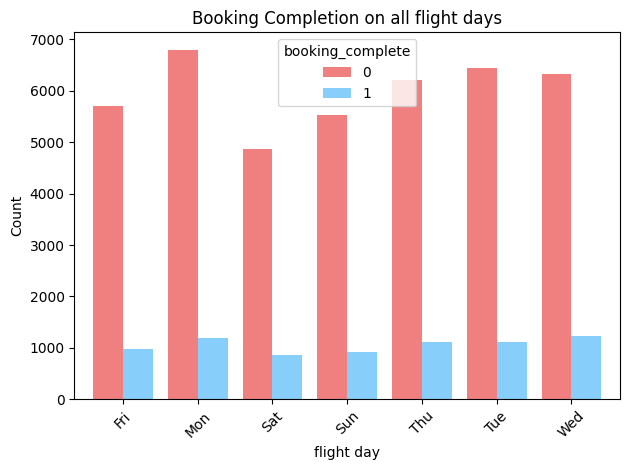

In [15]:
flight_day_data = df.groupby('flight_day')['booking_complete'].value_counts().unstack().fillna(0)

# Create a bar graph
plt.figure(figsize=(10, 6))
flight_day_data.plot(kind='bar', stacked=False,width = 0.8, color=['lightcoral', 'lightskyblue'])
plt.title('Booking Completion on all flight days')
plt.xlabel('flight day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# 5.	Create Pie Chart showing booking_completed for following features
## 'wants_extra_baggage',   'wants_preferred_seat',  'wants_in_flight_meals'


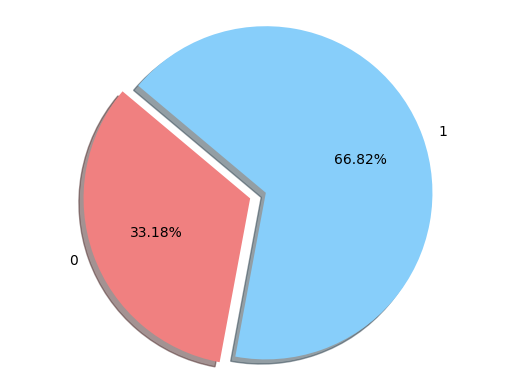

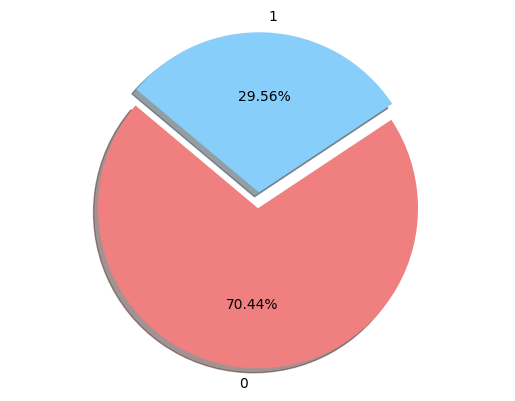

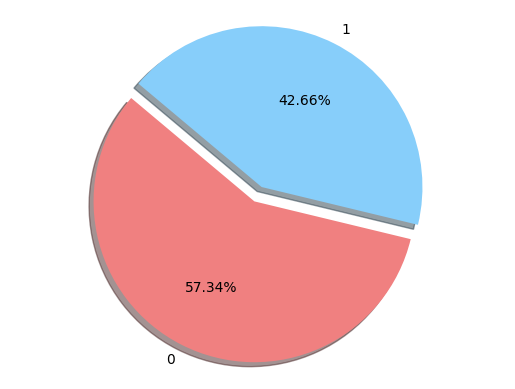

In [16]:
##################Pie cart for passengers who wants_extra_baggage ########################################
extra_bag_counts = df['wants_extra_baggage'].value_counts()

# Create a pie chart
labels = ['0', '1']
sizes = [extra_bag_counts[0], extra_bag_counts[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')  
plt.show()


##################Pie cart for passengers who wants_preferred_seat ########################################
prefered_seat_counts = df['wants_preferred_seat'].value_counts()

# Create a pie chart
labels = ['0', '1']
sizes = [prefered_seat_counts[0], prefered_seat_counts[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


################# #Pie cart for passengers who wants_in_flight_meals ##################################################

meal_counts = df['wants_in_flight_meals'].value_counts()

# Create a pie chart
labels = ['0', '1']
sizes = [meal_counts[0], meal_counts[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal') 
plt.show()

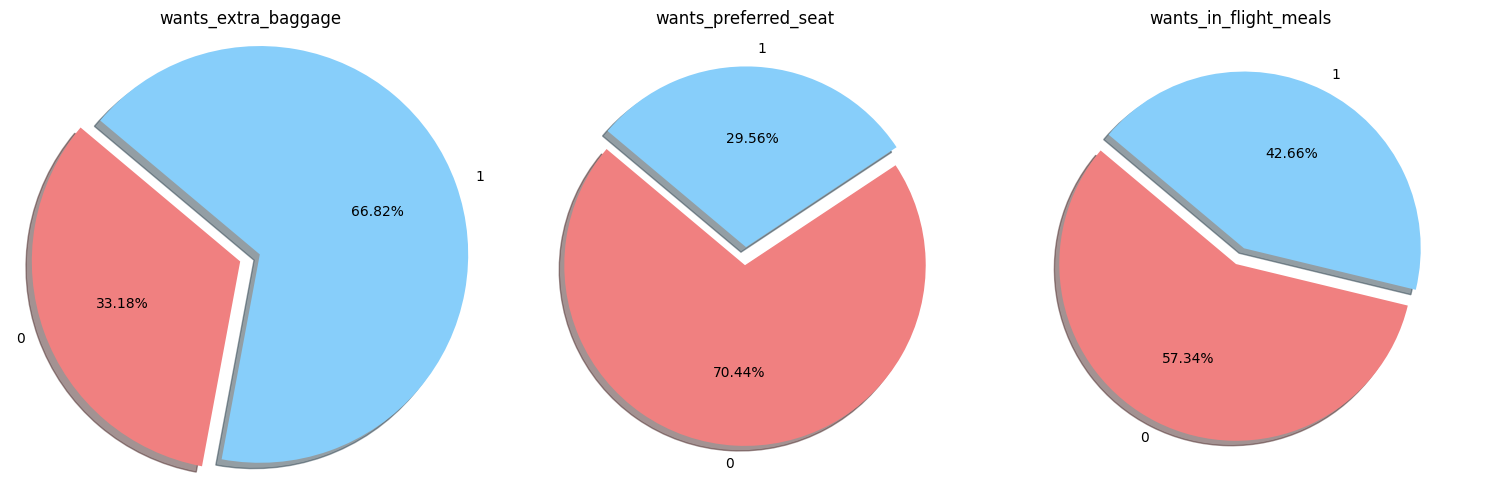

In [17]:
############### other method ###########################################
features = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
labels = ['0', '1']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the 'Yes' slice

# Create separate pie charts for each feature
plt.figure(figsize=(15, 5))

for idx, feature in enumerate(features, 1):
    plt.subplot(1, 3, idx)
    values = df[feature].value_counts()
    sizes = [values[0], values[1]]
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.2f%%', shadow=True, startangle=140)
    plt.title(feature)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

# 6.	Convert following categorical features using one hot encoding:
## 'sales_channel','trip_type','flight_day','booking_origin'


In [18]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'booking_origin'],drop_first = True)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,1,21,12,6,AKLHGH,0,0,0,7.21,1,...,False,False,False,False,False,False,False,False,False,False
1,2,262,19,7,AKLDEL,1,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
2,1,112,20,3,AKLDEL,0,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
3,2,243,22,17,AKLDEL,1,1,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
4,1,96,31,4,AKLDEL,0,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False


# 7.	Normalize following Numeric features:
## 'num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration'


In [19]:
# Specify the numeric features
numeric_features = ['num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the normalized DataFrame
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,-0.580606,21,-0.326745,-0.567271,AKLHGH,0,0,0,-0.046738,1,...,False,False,False,False,False,False,False,False,False,False
1,0.403133,262,-0.119836,-0.382529,AKLDEL,1,0,0,-1.176141,0,...,False,False,False,False,False,False,False,False,False,False
2,-0.580606,112,-0.090277,-1.121498,AKLDEL,0,0,0,-1.176141,0,...,False,False,False,False,False,False,False,False,False,False
3,0.403133,243,-0.031160,1.464892,AKLDEL,1,1,0,-1.176141,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.580606,96,0.234865,-0.936756,AKLDEL,0,0,1,-1.176141,0,...,False,False,False,False,False,False,False,False,False,False


# 8.	Create Training and Testing Dataset (Take 12% as test dataset)
## a.	Use following Algorithms to train on the dataset:
### i. 'Logistic Regression',  ii. 'KNN',   iii. 'SVM',  iv. 'Naive Bayes',  v. 'Decision Tree Classifier',  vi. 'Random Forest Classifier',  vii. 'XgBoost'


In [20]:
df = pd.get_dummies(df, columns=['route'],drop_first = True)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,route_TGGXIY,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY
0,-0.580606,21,-0.326745,-0.567271,0,0,0,-0.046738,1,False,...,False,False,False,False,False,False,False,False,False,False
1,0.403133,262,-0.119836,-0.382529,1,0,0,-1.176141,0,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.580606,112,-0.090277,-1.121498,0,0,0,-1.176141,0,False,...,False,False,False,False,False,False,False,False,False,False
3,0.403133,243,-0.031160,1.464892,1,1,0,-1.176141,0,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.580606,96,0.234865,-0.936756,0,0,1,-1.176141,0,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Specify the features and target
features = df.drop(columns=['booking_complete'])
target = df['booking_complete']

# Split the dataset into training and testing sets (88% training, 12% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.12, random_state=42)

# Initialize the StandardScaler and scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'XgBoost': XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.8561
KNN Accuracy: 0.8414
SVM Accuracy: 0.8585
Naive Bayes Accuracy: 0.2102
Decision Tree Classifier Accuracy: 0.7957
Random Forest Classifier Accuracy: 0.8542
XgBoost Accuracy: 0.8559


# 9. Find Value of k for which KNN Gives Best Accuracy

In [23]:
# Perform a grid search for different k values
best_k = None
best_accuracy = 0.0

for k in range(1, 21):  # Trying k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'Best k: {best_k} with accuracy {best_accuracy:.4f}')

Best k: 8 with accuracy 0.8549


# 10.	Print all evaluation metrics for all the Algorithms(find it on Test Data) i.e Precision, Recall, Accuracy and F1 Score, Confusion Matrix

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'XgBoost': XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'{model_name} Evaluation Metrics:')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')


Logistic Regression Evaluation Metrics:
Precision: 0.4583
Recall: 0.0920
Accuracy: 0.8561
F1 Score: 0.1532
Confusion Matrix:
[[4986   91]
 [ 760   77]]

KNN Evaluation Metrics:
Precision: 0.3928
Recall: 0.2210
Accuracy: 0.8414
F1 Score: 0.2829
Confusion Matrix:
[[4791  286]
 [ 652  185]]

SVM Evaluation Metrics:
Precision: 0.5000
Recall: 0.0131
Accuracy: 0.8585
F1 Score: 0.0256
Confusion Matrix:
[[5066   11]
 [ 826   11]]

Naive Bayes Evaluation Metrics:
Precision: 0.1484
Recall: 0.9665
Accuracy: 0.2102
F1 Score: 0.2573
Confusion Matrix:
[[ 434 4643]
 [  28  809]]

Decision Tree Classifier Evaluation Metrics:
Precision: 0.2907
Recall: 0.3070
Accuracy: 0.7959
F1 Score: 0.2987
Confusion Matrix:
[[4450  627]
 [ 580  257]]

Random Forest Classifier Evaluation Metrics:
Precision: 0.4292
Recall: 0.1159
Accuracy: 0.8531
F1 Score: 0.1825
Confusion Matrix:
[[4948  129]
 [ 740   97]]

XgBoost Evaluation Metrics:
Precision: 0.4561
Recall: 0.0932
Accuracy: 0.8559
F1 Score: 0.1548
Confusion Matrix: